## Import library

In [151]:
import pandas as pd
import matplotlib.pyplot as plt

In [152]:
path = 'MoMo Talent 2024_DA_Case Study Round_Questions.xlsx'
transactions = pd.read_excel(path, sheet_name='Data Transactions')
commission = pd.read_excel(path, sheet_name='Data Commission')
user_info = pd.read_excel(path, sheet_name='Data User_Info')

## Dataset overview

In [153]:
print("Shape of transactions dataset:\t", transactions.shape)
print("Shape of commission dataset:\t", commission.shape)
print("Shape of user_info dataset:\t", user_info.shape)

Shape of transactions dataset:	 (13495, 6)
Shape of commission dataset:	 (5, 3)
Shape of user_info dataset:	 (13428, 5)


### Transactions dataset

In [154]:
transactions.head()

,user_id,order_id,Date,Amount,Merchant_id,Purchase_status
0,21269588,4169517626,2020-01-01,"10,000",13,NaN
1,28097592,4170276686,2020-01-01,"20,000",13,NaN
2,47435144,4166729310,2020-01-01,"10,000",12,NaN
3,29080935,4174460303,2020-01-01,"10,000",13,NaN
4,14591075,4168216749,2020-01-01,"10,000",12,NaN


In [155]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13495 entries, 0 to 13494
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          13495 non-null  int64 
 1   order_id         13495 non-null  int64 
 2   Date             13495 non-null  object
 3   Amount           13495 non-null  object
 4   Merchant_id      13495 non-null  int64 
 5   Purchase_status  2235 non-null   object
dtypes: int64(3), object(3)
memory usage: 632.7+ KB


In [156]:
transactions.describe()

,user_id,order_id,Merchant_id
count,1.349500e+04,1.349500e+04,13495.000000
mean,4.021140e+07,6.385662e+09,12.761023
std,1.368218e+07,1.289348e+09,0.894556
min,1.138060e+05,4.166563e+09,12.000000
25%,3.597480e+07,5.303238e+09,12.000000
50%,4.346840e+07,6.274443e+09,12.000000
75%,4.940701e+07,7.502845e+09,13.000000
max,6.143328e+07,8.723876e+09,16.000000


In [157]:
transactions.describe(include=object)

,Date,Amount,Purchase_status
count,13495,13495,2235
unique,366,16,1
top,2020-06-30,"20,000",Mua hộ
freq,79,3357,2235


In [158]:
print("\tTHE NUMBER OF UNIQUE VALUES BY COLUMNS:")
transactions.nunique()

	THE NUMBER OF UNIQUE VALUES BY COLUMNS:


user_id            13390
order_id           13495
Date                 366
Amount                16
Merchant_id            5
Purchase_status        1
dtype: int64

In [159]:
transactions.duplicated().any()

False

In [160]:
print("Number of NaN values:\t", transactions.isna().sum().sum())

Number of NaN values:	 11260


In [161]:
# The percentage of missing values for each feature
missing_values = transactions.isnull().sum()
total_values = transactions.shape[0]
missing_percentages = (missing_values / total_values) * 100
missing_value = pd.DataFrame({'Feature': missing_values.index, 'Missing Value (%)': missing_percentages})
missing_value

,Feature,Missing Value (%)
user_id,user_id,0.00000
order_id,order_id,0.00000
Date,Date,0.00000
Amount,Amount,0.00000
Merchant_id,Merchant_id,0.00000
Purchase_status,Purchase_status,83.43831


### Commission dataset

In [162]:
commission.head()

,Merchant_name,Merchant_id,Rate_pct
0,Viettel,12,2
1,Mobifone,13,3
2,Vinaphone,14,4
3,Vietnamobile,15,4
4,Gmobile,16,4


In [163]:
commission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Merchant_name  5 non-null      object
 1   Merchant_id    5 non-null      int64 
 2   Rate_pct       5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 248.0+ bytes


In [164]:
commission.describe()

,Merchant_id,Rate_pct
count,5.000000,5.000000
mean,14.000000,3.400000
std,1.581139,0.894427
min,12.000000,2.000000
25%,13.000000,3.000000
50%,14.000000,4.000000
75%,15.000000,4.000000
max,16.000000,4.000000


In [165]:
commission.describe(include=object)

,Merchant_name
count,5
unique,5
top,Viettel
freq,1


In [166]:
print("\tTHE NUMBER OF UNIQUE VALUES BY COLUMNS:")
commission.nunique()

	THE NUMBER OF UNIQUE VALUES BY COLUMNS:


Merchant_name    5
Merchant_id      5
Rate_pct         3
dtype: int64

In [167]:
commission.duplicated().any()

False

In [168]:
print("Number of NaN values:\t", commission.isna().sum().sum())

Number of NaN values:	 0


In [169]:
# The percentage of missing values for each feature
missing_values = commission.isnull().sum()

total_values = commission.shape[0]

missing_percentages = (missing_values / total_values) * 100

missing_value = pd.DataFrame({'Feature': missing_values.index, 'Missing Value (%)': missing_percentages})
missing_value

,Feature,Missing Value (%)
Merchant_name,Merchant_name,0.0
Merchant_id,Merchant_id,0.0
Rate_pct,Rate_pct,0.0


### User info dataset

In [170]:
user_info.head()

,User_id,First_tran_date,Location,Age,Gender
0,41654498,2018-05-02,HCMC,33_to_37,MALE
1,51276281,2019-12-08,Other Cities,unknown,MALE
2,49152375,2019-12-20,Other Cities,23_to_27,MALE
3,5971050,2019-08-01,HCMC,28_to_32,MALE
4,48134464,2019-08-23,Other Cities,18_to_22,FEMALE


In [171]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13428 entries, 0 to 13427
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User_id          13428 non-null  int64 
 1   First_tran_date  13428 non-null  object
 2   Location         13428 non-null  object
 3   Age              13428 non-null  object
 4   Gender           13428 non-null  object
dtypes: int64(1), object(4)
memory usage: 524.7+ KB


In [172]:
user_info.describe(include=object)

,First_tran_date,Location,Age,Gender
count,13428,13428,13428,13428
unique,1590,6,6,8
top,2020-02-14,Other Cities,23_to_27,MALE
freq,45,6022,3421,6282


In [173]:
print("\tTHE NUMBER OF UNIQUE VALUES BY COLUMNS:")
user_info.nunique()

	THE NUMBER OF UNIQUE VALUES BY COLUMNS:


User_id            13390
First_tran_date     1590
Location               6
Age                    6
Gender                 8
dtype: int64

In [174]:
user_info.duplicated().any()

False

In [175]:
print("Number of NaN values:\t", user_info.isna().sum().sum())

Number of NaN values:	 0


In [176]:
# The percentage of missing values for each feature
missing_values = user_info.isnull().sum()
total_values = user_info.shape[0]
missing_percentages = (missing_values / total_values) * 100
missing_value_df = pd.DataFrame({'Feature': missing_values.index, 'Missing Value (%)': missing_percentages})
missing_value_df

,Feature,Missing Value (%)
User_id,User_id,0.0
First_tran_date,First_tran_date,0.0
Location,Location,0.0
Age,Age,0.0
Gender,Gender,0.0


## Part A: Data Processing

1. Using data from the 'Commission' table, add a column 'Revenue' in the 'Transactions' table that displays MoMo's earned revenue for each order, and then calculate MoMo's total revenue in January 2020.

In [177]:
transactions['Amount'] = transactions['Amount'].replace(',', '', regex=True).astype(float)
transactions['Date'] = pd.to_datetime(transactions['Date'], dayfirst=True, format='mixed', errors='coerce')
transactions_merged = transactions.merge(commission, on='Merchant_id', how='left')
transactions_merged['Revenue'] = transactions_merged['Amount']*(transactions_merged['Rate_pct']/100)
january_revenue = transactions_merged[transactions_merged['Date'].dt.month==1]
total_january_revenue = january_revenue['Revenue'].sum()
print("Add a column 'Revenue' in the 'Transactions' table that displays MoMo's earned revenue for each order:")
transactions_merged.head()

Add a column 'Revenue' in the 'Transactions' table that displays MoMo's earned revenue for each order:


,user_id,order_id,Date,Amount,Merchant_id,Purchase_status,Merchant_name,Rate_pct,Revenue
0,21269588,4169517626,2020-01-01,10000.0,13,NaN,Mobifone,3,300.0
1,28097592,4170276686,2020-01-01,20000.0,13,NaN,Mobifone,3,600.0
2,47435144,4166729310,2020-01-01,10000.0,12,NaN,Viettel,2,200.0
3,29080935,4174460303,2020-01-01,10000.0,13,NaN,Mobifone,3,300.0
4,14591075,4168216749,2020-01-01,10000.0,12,NaN,Viettel,2,200.0


In [178]:
print("MoMo's total revenue in January 2020:", total_january_revenue)

MoMo's total revenue in January 2020: 1409827.02


2. What is MoMo's most profitable month?

In [179]:
monthly_revenue = transactions_merged.groupby(transactions_merged['Date'].dt.month)['Revenue'].sum()
most_profitable_month = monthly_revenue.idxmax()
most_profitable_month_revenue = monthly_revenue.max()
print("MoMo's most profitable month is", most_profitable_month, "with the profit of:", most_profitable_month_revenue)

MoMo's most profitable month is 9 with the profit of: 1702200.0


3. What day of the week does MoMo make the most money, on average? The least money?

In [180]:
daily_revenue_avg = transactions_merged.groupby(transactions_merged['Date'].dt.dayofweek)['Revenue'].mean()
most_profitable_day_revenue = daily_revenue_avg.max()
least_profitable_day_revenue = daily_revenue_avg.min()
day_mapping = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
most_profitable_day_name = day_mapping[daily_revenue_avg.idxmax()]
least_profitable_day_name = day_mapping[daily_revenue_avg.idxmin()]
print(most_profitable_day_name, "is the day of the week that MoMo makes the most money, on average with", round(most_profitable_day_revenue,2), "and", least_profitable_day_name, "is the least money with", round(least_profitable_day_revenue,2))

Wednesday is the day of the week that MoMo makes the most money, on average with 1482.54 and Monday is the least money with 1304.44


4. Combined with the 'User_Info' table, add columns: Age, Gender, Location, Type_user (New/Current) in 'Transactions' table and calculate the total number of new users in December 2020. (New = the transaction was in the month of the first time the user used Topup; Current = the user had used Topup before that month)

In [181]:
def determine_user_type(row):
    if row['Date'].year == row['First_tran_date'].year and row['Date'].month == row['First_tran_date'].month:
        return 'New'
    else:
        return 'Current'

In [182]:
user_info = user_info[user_info['First_tran_date'] < '2021-01-01']
user_info['First_tran_date'] = pd.to_datetime(user_info['First_tran_date'])
transactions_merged_user_info = transactions_merged.merge(user_info, left_on='user_id', right_on='User_id', how='left')
transactions_merged_user_info['Type_user'] = transactions_merged_user_info.apply(determine_user_type, axis=1)
new_users_dec_2020 = transactions_merged_user_info[(transactions_merged_user_info['Date'].dt.month == 12) & (transactions_merged_user_info['Date'].dt.year == 2020) & (transactions_merged_user_info['Type_user'] == 'New')]
total_new_users_dec_2020 = new_users_dec_2020['user_id'].nunique()
print("Total number of new users in December 2020 is", total_new_users_dec_2020)

Total number of new users in December 2020 is 72


## Part B: Data Visualization

5. Design a performance-tracking dashboard of this service by month, tracking a variety of metrics that you think might be helpful to the business. (Hint: Using information in the questions above)

#### Total Monthly Revenue

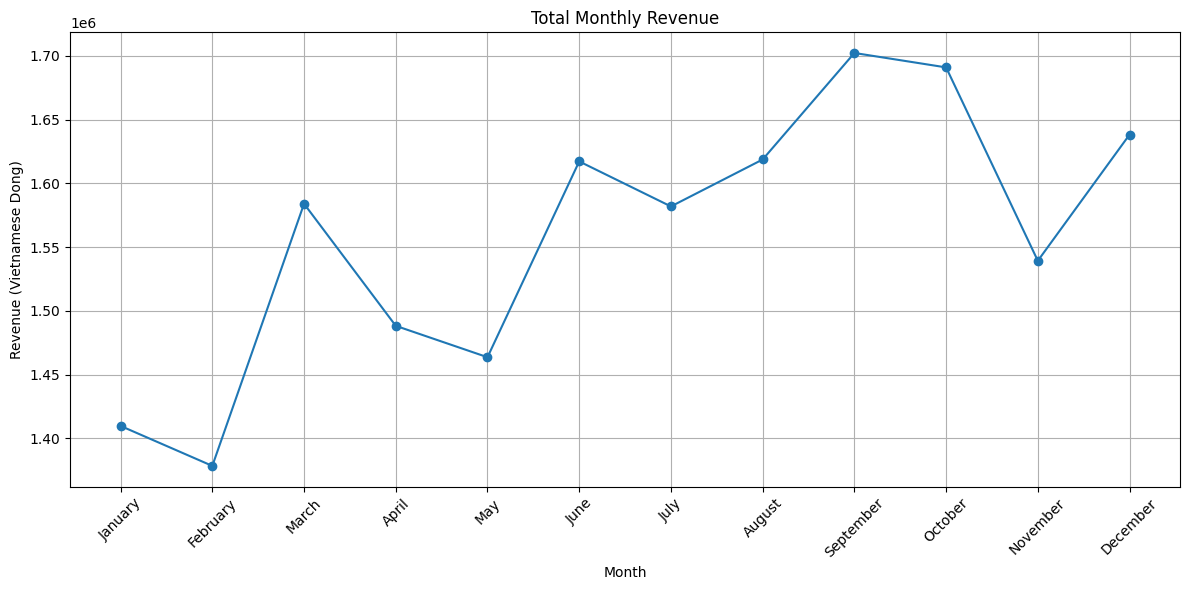

In [183]:
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
monthly_revenue.index = monthly_revenue.index.map(month_names)
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue, marker='o', linestyle='-')
plt.title('Total Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue (Vietnamese Dong)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('total_monthly_revenue.png')
plt.show()

#### Average Revenue Per Day Of The Week

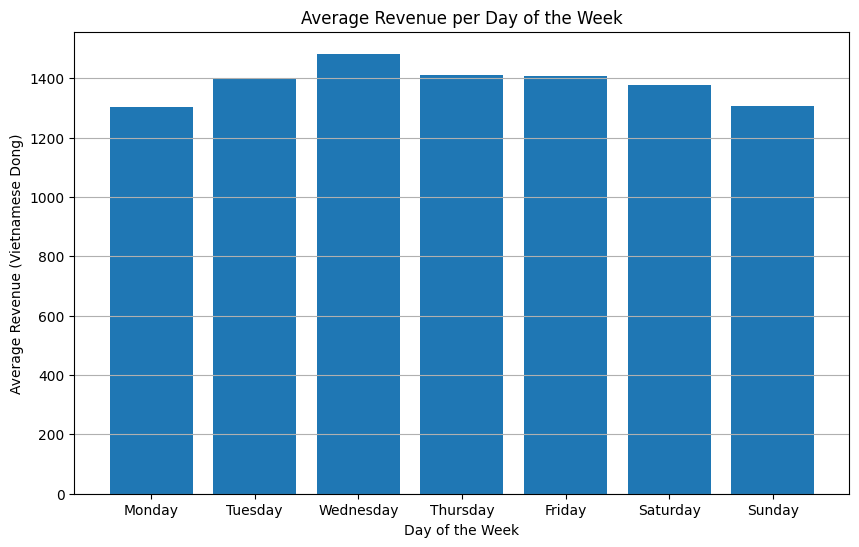

In [184]:
daily_revenue_avg.index = daily_revenue_avg.index.map(day_mapping)
plt.figure(figsize=(10, 6))
plt.bar(daily_revenue_avg.index, daily_revenue_avg)
plt.title('Average Revenue per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Revenue (Vietnamese Dong)')
plt.grid(axis='y')
plt.savefig('average_revenue_per_day.png')
plt.show()

#### Number Of New And Current Users Each Month

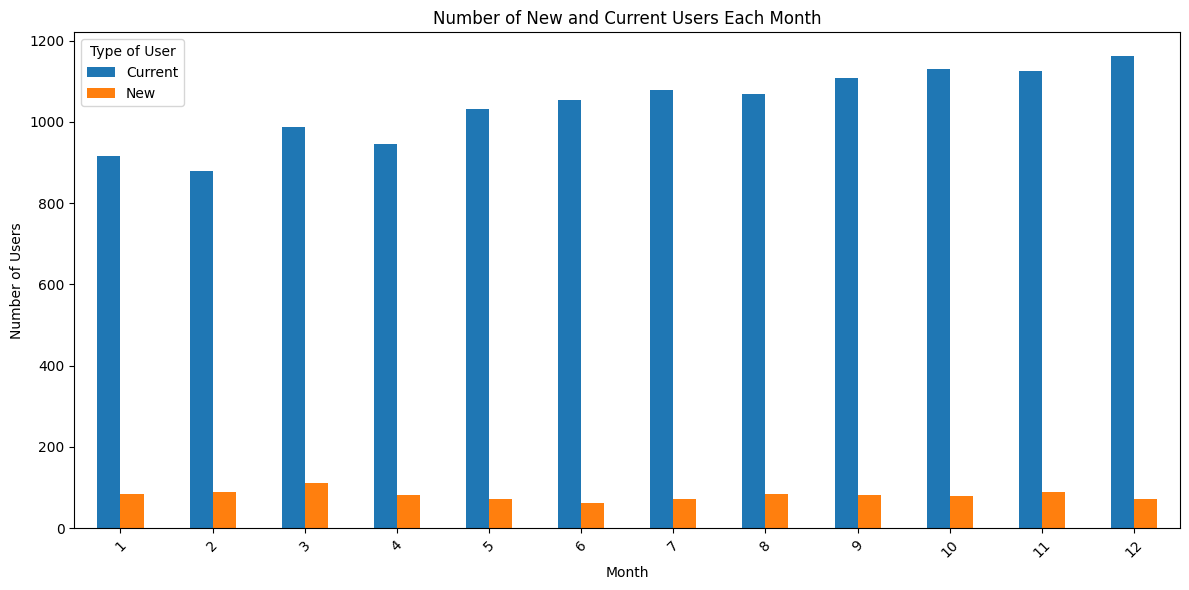

In [185]:
user_type_counts = transactions_merged_user_info.groupby([transactions_merged_user_info['Date'].dt.month, 'Type_user'])['user_id'].nunique().reset_index()
user_type_pivot = user_type_counts.pivot(index='Date', columns='Type_user', values='user_id').fillna(0)
user_type_pivot.plot(kind='bar', stacked=False, figsize=(12, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Number of New and Current Users Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.legend(title='Type of User')
plt.tight_layout()
plt.savefig('new_current_users_per_month.png')
plt.show()

#### Total Number Of Transactions Per Month

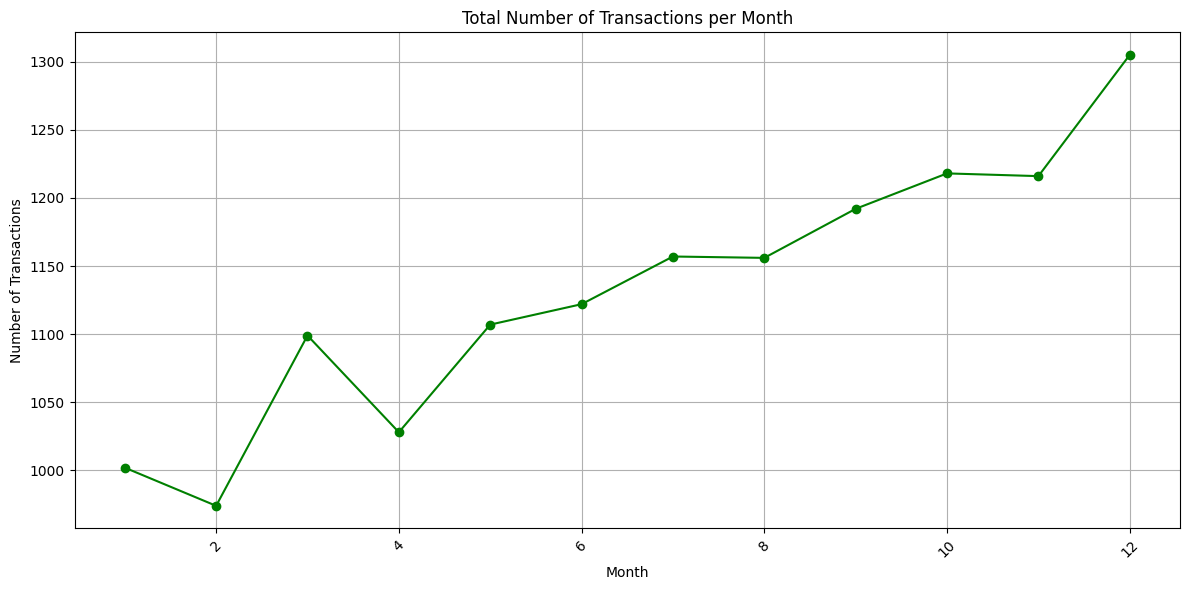

In [186]:
monthly_transactions = transactions_merged_user_info.groupby(transactions_merged_user_info['Date'].dt.month)['order_id'].count().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(monthly_transactions['Date'], monthly_transactions['order_id'], marker='o', linestyle='-', color='green')
plt.title('Total Number of Transactions per Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('total_transactions_per_month.png')
plt.show()

#### Average Transaction Amount Per Month

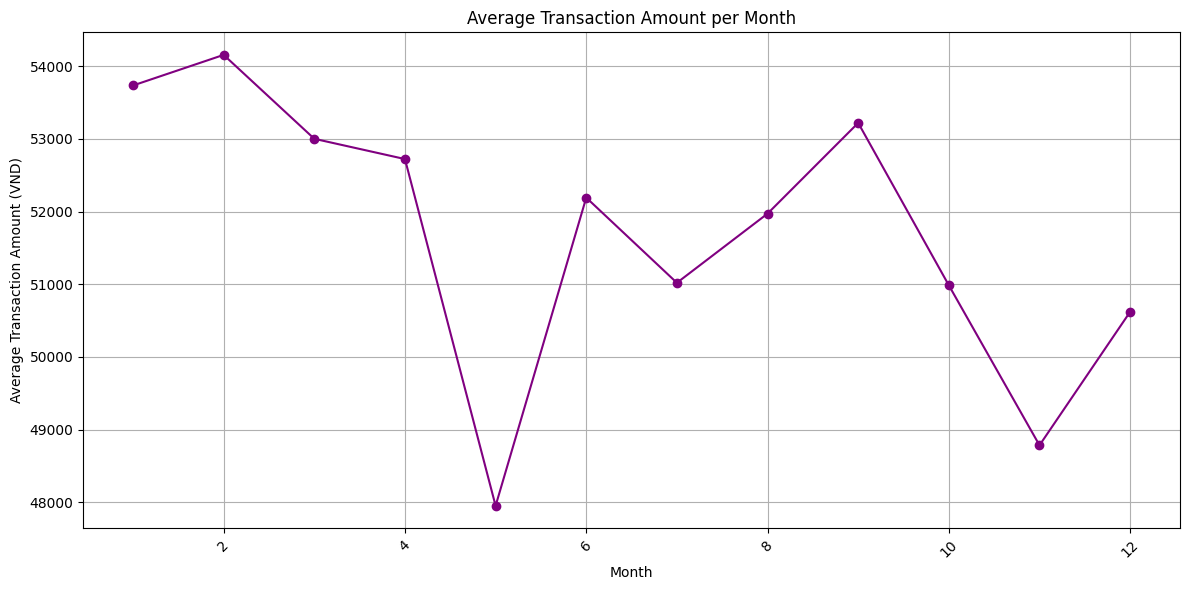

In [187]:
monthly_avg_transaction_amount = transactions_merged_user_info.groupby(transactions_merged_user_info['Date'].dt.month)['Amount'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_transaction_amount['Date'], monthly_avg_transaction_amount['Amount'], marker='o', linestyle='-', color='purple')
plt.title('Average Transaction Amount per Month')
plt.xlabel('Month')
plt.ylabel('Average Transaction Amount (VND)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('average_transaction_amount_per_month.png')
plt.show()

#### Revenue Contribution From Top Merchants Each Month

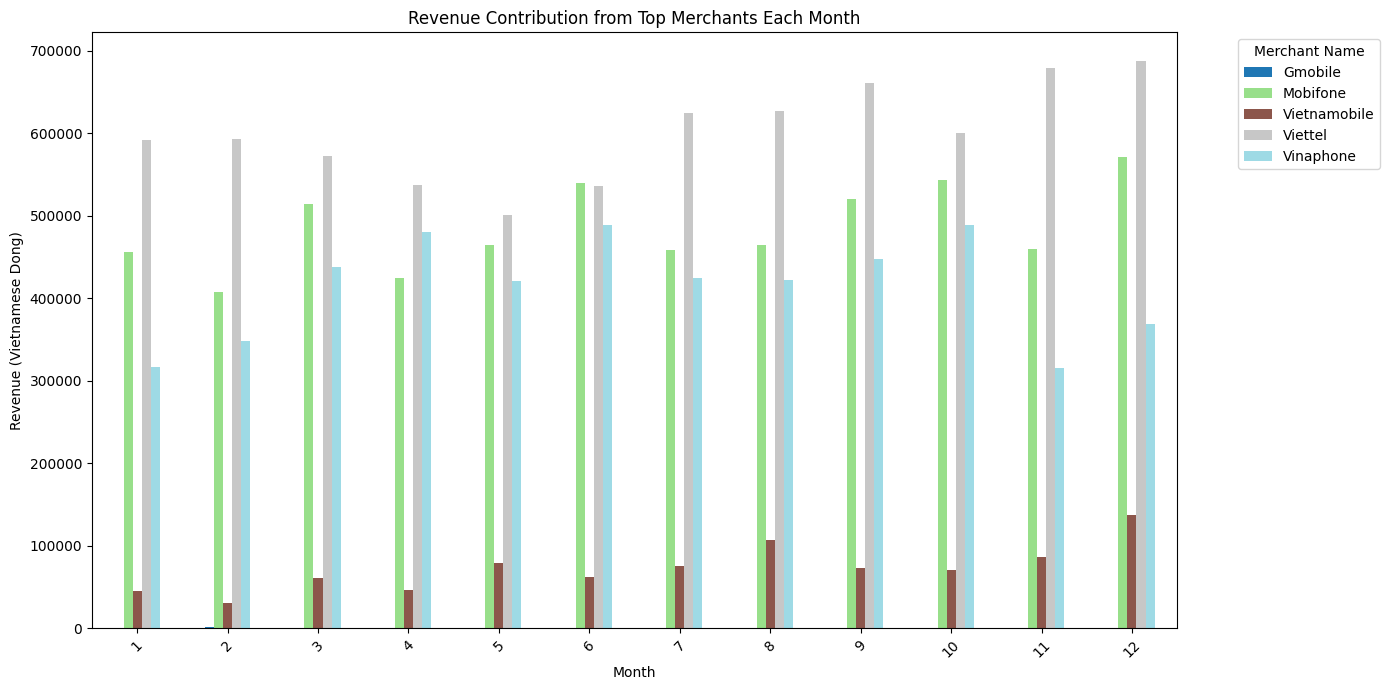

In [188]:
monthly_merchant_revenue = transactions_merged_user_info.groupby([transactions_merged_user_info['Date'].dt.month, 'Merchant_name'])['Revenue'].sum().reset_index()
top_merchants = monthly_merchant_revenue.pivot(index='Date', columns='Merchant_name', values='Revenue').fillna(0)
top_merchants.plot(kind='bar', stacked=False, figsize=(14, 7), colormap='tab20')
plt.title('Revenue Contribution from Top Merchants Each Month')
plt.xlabel('Month')
plt.ylabel('Revenue (Vietnamese Dong)')
plt.xticks(rotation=45)
plt.legend(title='Merchant Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('revenue_top_merchants_per_month.png')
plt.show()

#### User Age Distribution

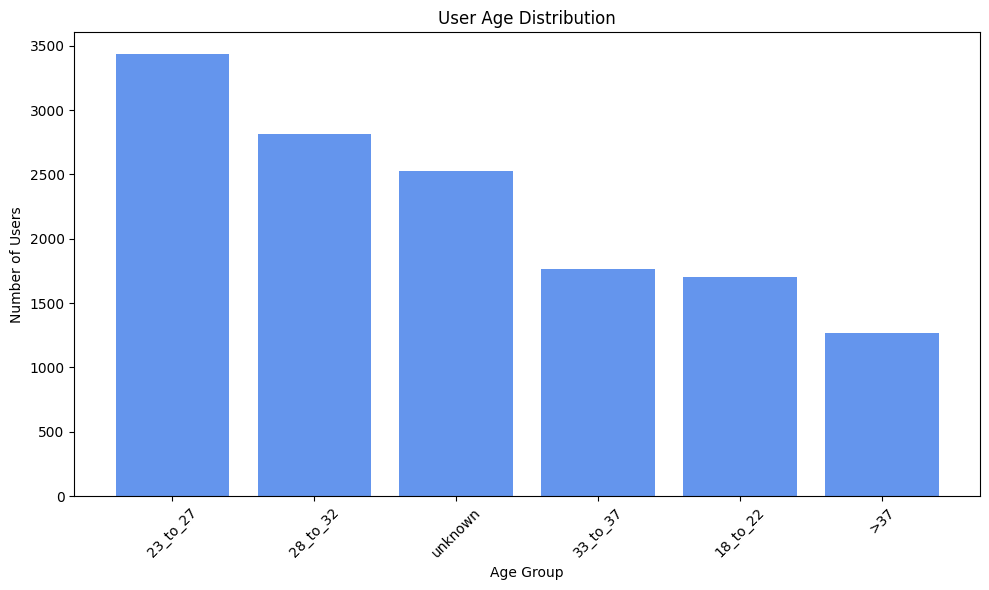

In [189]:
age_distribution = transactions_merged_user_info['Age'].value_counts().reset_index()
age_distribution.columns = ['Age', 'Count']
plt.figure(figsize=(10, 6))
plt.bar(age_distribution['Age'], age_distribution['Count'], color='cornflowerblue')
plt.title('User Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('user_age_distribution.png')
plt.show()

#### User Gender Distribution

In [190]:
unique_genders = transactions_merged_user_info['Gender'].unique()
unique_genders

array(['FEMALE', 'female', 'Nữ', 'MALE', 'Nam', 'f', 'male', 'M', nan],
      dtype=object)

In [191]:
def map_gender(gender):
    if gender in ['MALE', 'Nam', 'M', 'male']:
        return 'Male'
    elif gender in ['FEMALE', 'Nữ', 'female', 'f']:
        return 'Female'
    else:
        return 'Unknown'

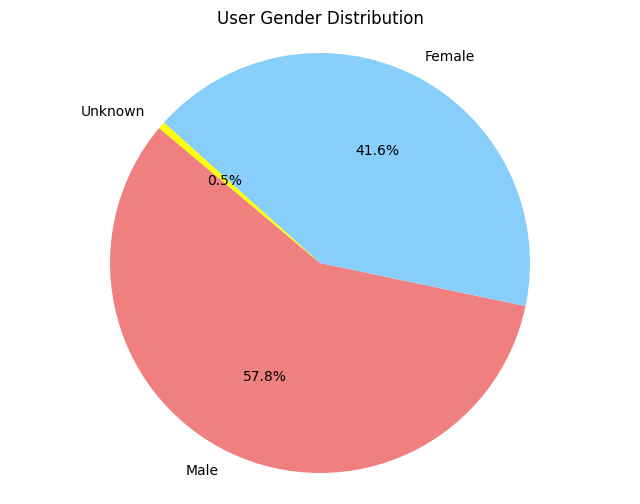

In [192]:
transactions_merged_user_info['Gender'] = transactions_merged_user_info['Gender'].apply(map_gender)
gender_distribution = transactions_merged_user_info['Gender'].value_counts().reset_index()
gender_distribution.columns = ['Gender', 'Count']
plt.figure(figsize=(8, 6))
plt.pie(gender_distribution['Count'], labels=gender_distribution['Gender'], autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue', 'yellow'])
plt.title('User Gender Distribution')
plt.axis('equal')
plt.savefig('user_gender_distribution_unified.png')
plt.show()

#### User Location Distribution

In [193]:
unique_locations = transactions_merged_user_info['Location'].unique()
unique_locations

array(['HN', 'Other Cities', 'HCMC', 'Other', 'Unknown',
       'Ho Chi Minh City', nan], dtype=object)

In [194]:
def map_location(location):
    if location in ['HCMC', 'Ho Chi Minh City']:
        return 'Ho Chi Minh City'
    elif location in ['Other Cities', 'Other']:
        return 'Other Cities'
    elif location in ['HN']:
        return 'Ha Noi'
    else:
        return 'Unknown'

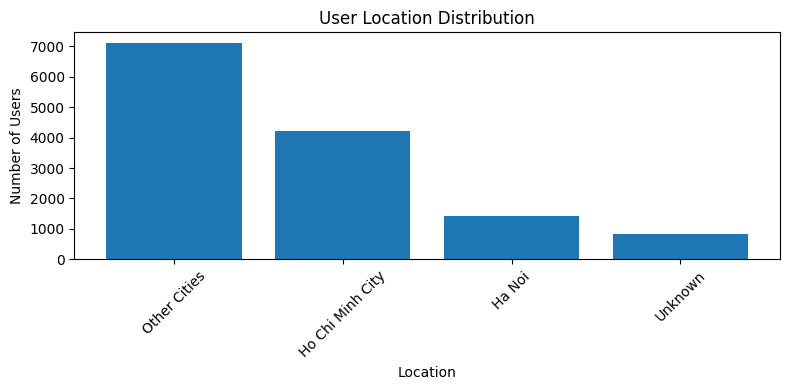

In [195]:
location_distribution = transactions_merged_user_info['Location'].apply(map_location).value_counts().reset_index()
location_distribution.columns = ['Location', 'Count']
plt.figure(figsize=(8, 4))
plt.bar(location_distribution['Location'], location_distribution['Count'])
plt.title('User Location Distribution')
plt.xlabel('Location')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('user_location_distribution.png')
plt.show()

## Part C: Analysis & Business Insights

Based on the provided data, what observations and insights can you draw about user demographics and transaction behavior (e.g. trends, classifications)?

1. Transaction Trends: 

    Analyze the frequency and amount of transactions over time to identify any trends or patterns, such as increased activity during specific periods (e.g., holidays).

2. User Demographics: 

    Assess how different age groups, genders, and locations interact with the services. This might reveal which demographic segments are more engaged or spend more.

3. Merchant Analysis: 

    Look into which merchants have the most transactions and how commission rates impact transaction volumes.

4. Purchase Status: 

    Although currently empty, this field could potentially offer insights into transaction success rates or common issues faced by users.

Do you have any advice for the Marketing department in designing promotion campaigns to increase Topup's monthly performance?

1. Segmented Targeting

    Demographic-Based Promotions: Use the Data User_Info to tailor promotions based on age, gender, and location. For instance, if younger demographics (e.g., 18_to_22) are more active, consider offers that resonate with their preferences, like small but frequent top-up bonuses.

2. Behavioral Targeting

    First-Time User Offers: Encourage first-time users with special discounts or bonus credits on their initial transactions, which can be identified from First_tran_date.

    Loyalty Rewards: For users with frequent transactions, introduce a loyalty program offering incremental benefits, encouraging continued engagement.

3. Time-Based Promotions

    Analyzing Peak Times: Identify peak transaction times and days from the Data Transactions. Offer special promotions during these times to maximize participation.

4. Partnership and Bundling

    Merchant Collaborations: Partner with merchants (from Data Commission) to offer bundled services or cross-promotions. For instance, collaborate with high-commission merchants to provide exclusive top-up deals when using their services.

    Cross-Promotional Discounts: Offer discounts or additional top-up credits when users engage with other services provided by MoMo, fostering an ecosystem of usage.

5. Data-Driven Adjustments

    Performance Analysis: Regularly analyze the performance of different campaigns, adjusting tactics based on what works best. Use A/B testing to compare different promotions and refine strategies based on data insights.

6. Communication and Outreach

    Effective Messaging: Ensure that the promotion messages are clear, attractive, and effectively communicated through the right channels (social media, app notifications, SMS, etc.).

Momo is facing stiff competition from a host of other e-wallets that have deep mobile card cashback schemes for users. In response, MoMo is considering deducting a part of revenue to increase cashback for users in all Telco merchants.

Suppose that users currently earn a flat 1% cash-back on their spending amount. The proposed change is as follows:

![image.png](attachment:image.png)

How does this affect the service (Comment from many perspectives)? Do you agree with this option?

1. Financial Perspective

    Revenue Impact: Increasing cashback will reduce the margin per transaction. If the increase in transaction volume does not offset the higher cashback costs, it could lead to reduced net revenue.

    Cost Management: This strategy implies that MoMo is willing to sacrifice short-term profits for long-term gains in market share. The key will be to carefully manage the balance between attractive cashback incentives and the sustainability of the business model.

2. Market Perspective

    Competitive Positioning: Higher cashback can make MoMo more appealing compared to competitors, potentially increasing its market share. This strategy can be particularly effective if competitors are unable to match the cashback offers due to financial constraints.

    Customer Attraction and Retention: Increased cashback can attract new users and increase loyalty among existing users. Users may be more inclined to use MoMo for their transactions if they feel they are getting better value compared to other services.

3. User Experience Perspective

    Perceived Value: Higher cashback directly enhances the perceived value of the service to users. This can lead to increased user satisfaction and positive word-of-mouth, further boosting user acquisition.

    Engagement: Enhanced cashback offers can encourage more frequent transactions and greater engagement with the platform, possibly leading to increased usage of other MoMo services.
    Strategic Perspective

    Long-Term Growth: Investing in user growth through cashback might be a strategic move to capture a larger user base, which is crucial for the network effects in the e-wallet industry.

    Differentiation: By offering the highest cashback rates, MoMo could differentiate itself in a crowded market, assuming that competitors do not immediately match these offers.

4. Risks

    Financial Sustainability: The key risk is the financial sustainability of offering higher cashback rates. It’s crucial that the increased user base and transaction volume compensate for the reduced per-transaction revenue.

    Competitor Reaction: Competitors might respond by launching their own enhanced cashback or other incentive programs, potentially leading to a "race to the bottom" where profit margins are continually eroded.

Conclusion

    I generally agree with the proposal to increase cashback rates, especially if MoMo’s market analysis suggests that cashback is a major decision factor for its users. However, it’s essential to monitor the financial impacts closely and have a flexible strategy that can be adjusted based on market response and financial outcomes. It's also crucial to consider additional value-added services or improvements in user experience that can complement the cashback offers to create a more sustainable competitive advantage.



What other Topup development strategy ideas do you have for MoMo?

1. Enhanced User Experience

    Simplified Transaction Process: Streamline the top-up process to require fewer steps and faster completion times. Implement intuitive UI/UX enhancements to make navigation and operation more user-friendly.

    Instant Notifications: Develop real-time notifications for successful transactions, promotions, and personalized offers based on user behavior and preferences.

2. Customized Offers and Personalization

    Dynamic Pricing Models: Introduce flexible pricing where top-up bonuses or discounts can vary based on the user's purchase history, loyalty, or time of transaction.

    Personalized Marketing: Use machine learning to analyze user data and provide tailored offers and recommendations. For instance, predict when users are likely to need a top-up based on their usage patterns and prompt them with timely offers.

3. Loyalty and Rewards Programs

    Tiered Loyalty System: Implement a tiered loyalty program that rewards users based on their transaction volume or frequency. Benefits could include higher cashback percentages, exclusive access to new services, or special offers with partner brands.

    Gamification: Introduce elements of gamification such as earning points for transactions, which can be redeemed for rewards or used for contests and sweepstakes.

4. Strategic Partnerships and Integration

    Collaborate with Telecom Operators: Strengthen partnerships with telecom operators to offer exclusive services, bundled packages, or co-branded products that enhance value for both MoMo and the operator’s customers.

    Cross-Industry Partnerships: Expand partnerships beyond telecom to include entertainment, utilities, or finance sectors, offering bundled top-up deals when paying bills or purchasing services.

5. Technology-Driven Innovations

    Blockchain for Transparency and Security: Explore the use of blockchain technology to enhance transparency and security in transactions, which could also reduce costs associated with fraud and chargebacks.

    AI and Machine Learning: Utilize AI to enhance fraud detection, automate customer support via chatbots, and improve financial analytics for predicting market trends and user behaviors.

6. Financial Inclusion Initiatives

    Micro Top-ups: Offer micro top-ups at a very low cost to cater to budget-conscious consumers, potentially increasing the frequency of transactions.

    Rural Expansion Programs: Develop specific programs aimed at increasing the penetration of mobile top-up services in underserved rural areas, possibly through mobile agents or localized service centers.

7. Sustainability and Corporate Responsibility

    Eco-friendly Initiatives: Launch initiatives to offset the carbon footprint of digital transactions or contribute to social causes, enhancing corporate image and appealing to environmentally and socially conscious consumers.